In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from fitter import Fitter

In [2]:
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

In [3]:
pd.set_option('display.max.columns', None) #menampilkan semua kolom

In [4]:
df = pd.read_csv('Sales.csv') #membaca sales.csv
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


# Preprocessing

# df_sale

In [5]:
#membuat dataframe sale price
df_sale = df[['BOROUGH','SALE PRICE']]
df_sale

,BOROUGH,SALE PRICE
0,1,6625000
1,1,-
2,1,-
3,1,3936272
4,1,8000000
...,...,...
84543,5,450000
84544,5,550000
84545,5,460000
84546,5,11693337


In [6]:
df_sale.value_counts() 

BOROUGH  SALE PRICE
3        0             8357
4         -            8295
1         -            3867
5         -            2399
2        0             1871
                       ... 
3        16250000         1
         1628181          1
1        1941536          1
3        1632254          1
         2602039          1
Length: 15000, dtype: int64

In [7]:
df_sale = df_sale.replace(' -  ', np.nan) # ' -  ' diubah menjadi nan

In [8]:
df_sale = df_sale.dropna() #drop nan

In [9]:
df_sale

,BOROUGH,SALE PRICE
0,1,6625000
3,1,3936272
4,1,8000000
6,1,3192840
9,1,16232000
...,...,...
84543,5,450000
84544,5,550000
84545,5,460000
84546,5,11693337


In [10]:
df_sale = df_sale.astype('int64') # mengubah tipe data df_sale menjadi int64

In [11]:
df_sale.drop(df_sale[df_sale['SALE PRICE'] < 11].index, inplace = True) # drop nilai 0 dan 10

In [12]:
df_sale.value_counts()

BOROUGH  SALE PRICE
4        450000        158
         650000        147
         600000        141
         250000        139
         400000        132
                      ... 
1        755500          1
3        280018          1
         280301          1
         280878          1
5        122000000       1
Length: 14979, dtype: int64

# df_borough

In [13]:
#membuat dataframe borough
df_borough = df[['BOROUGH']]
df_borough.head()

,BOROUGH
0,1
1,1
2,1
3,1
4,1


In [14]:
df_borough.value_counts()

BOROUGH
4          26736
3          24047
1          18306
5           8410
2           7049
dtype: int64

# df_land

In [15]:
#membuat dataframe LAND SQUARE FEET
df_land = df[['LAND SQUARE FEET']]
df_land.head()

,LAND SQUARE FEET
0,1633
1,4616
2,2212
3,2272
4,2369


In [16]:
df_land.value_counts()

LAND SQUARE FEET
 -                  26252
0                   10326
2000                 3919
2500                 3470
4000                 3044
                    ...  
3954                    1
3957                    1
3959                    1
12112                   1
4241                    1
Length: 6062, dtype: int64

In [17]:
df_land = df_land.replace(' -  ', np.nan) # ' -  ' diubah menjadi nan

In [18]:
df_land = df_land.dropna() #drop nan

In [19]:
df_land.value_counts()

LAND SQUARE FEET
0                   10326
2000                 3919
2500                 3470
4000                 3044
1800                 1192
                    ...  
3954                    1
3957                    1
3959                    1
12118                   1
4241                    1
Length: 6061, dtype: int64

In [20]:
df_land = df_land.astype('int64') # mengubah tipe data df_land menjadi int64

In [21]:
df_land.drop(df_land[df_land['LAND SQUARE FEET'] < 1].index, inplace = True) # drop nilai 0 

# df_tax

In [22]:
df_tax = df[['BOROUGH','TAX CLASS AT PRESENT']]

In [23]:
df_tax = df_tax.replace([' ','1A','1B','1C','2A','2B','2C'], np.nan) #mengubah data menjadi nan

In [24]:
df_tax = df_tax.dropna() #drop nan

In [25]:
df_tax = pd.crosstab(df_tax['BOROUGH'], df_tax['TAX CLASS AT PRESENT'])
df_tax

TAX CLASS AT PRESENT,1,2,3,4
BOROUGH,,,,
1,341,15320,2,1333
2,4053,1787,2,530
3,11753,5839,0,2169
4,15761,7548,0,1748
5,6725,425,0,360


# df_units

In [26]:
df_units = df[['TOTAL UNITS']]

In [27]:
df_units.value_counts()

TOTAL UNITS
1              38356
0              19762
2              15914
3               5412
4               1498
               ...  
145                1
143                1
142                1
140                1
2261               1
Length: 192, dtype: int64

# Measure of Central Tendency : Mean

In [28]:
mean_sale_price = df_sale['SALE PRICE'].mean() #menghitung mean / rata-rata dari property di New York
mean_sale_price

1517966.3068374908

# Measure of Central Tendency : Median

In [29]:
median_sale_price = df_sale['SALE PRICE'].median() #menghitung median / nilai tengah dari harga property di New York
median_sale_price

635000.0

# Measure of Central Tendency : Modus

In [30]:
modus_borough = df_borough['BOROUGH'].mode() #menghitung modus / nilai yang paling banyak keluar dari borough
modus_borough

0    4
dtype: int64

#  Measure of Spread : Range

In [31]:
range_sale = np.ptp(df_sale) #menghitung range / max-min dari sale
range_sale

2209999999

# Measure of Spread : Variance

In [32]:
variance_land = df_land['LAND SQUARE FEET'].var(ddof=0) #menghitung variance dari land, ddof=0 karna data populasi yang digunakan
variance_land

2137980925.7529352

# Measure of Spread : Standard Deviation

In [33]:
SD_land = df_land['LAND SQUARE FEET'].std(ddof=0) #menghitung SD dari land, ddof=0 karna data populasi yang digunakan
SD_land

46238.30582701896

# Probability Distribution

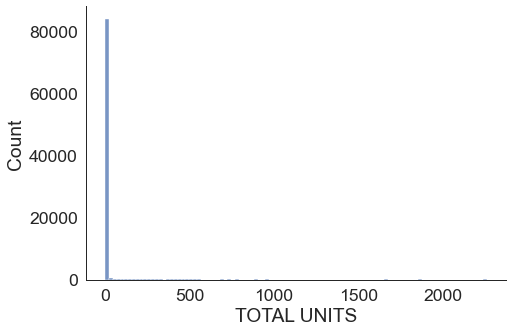

In [34]:
#membuat plotting
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df_units, x="TOTAL UNITS", kind="hist", bins = 100, aspect = 1.5)

In [35]:
units = df_units["TOTAL UNITS"].values

,sumsquare_error,aic,bic,kl_div
gamma,0.001919,147417.201261,-1.488119e+06,inf


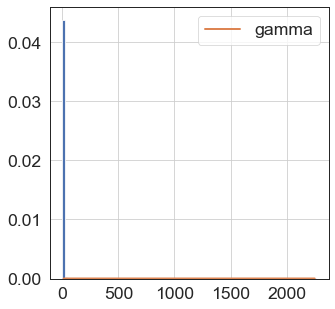

In [36]:
#membuat distribusi
f = Fitter(units,
           distributions=['gamma'])
f.fit()
f.summary()

# Convidence Interval

In [37]:
df_tax

TAX CLASS AT PRESENT,1,2,3,4
BOROUGH,,,,
1,341,15320,2,1333
2,4053,1787,2,530
3,11753,5839,0,2169
4,15761,7548,0,1748
5,6725,425,0,360


In [38]:
n = df_tax['4'].sum() #jumlah
p_tax = 2169/(n) #hitung proporsi
p_tax

0.353257328990228

In [39]:
sm.stats.proportion_confint(n * p_tax, n) #Confidence interval

(0.34130162224738486, 0.3652130357330711)

# Hypothesis Testing

Apakah Brox memiliki harga rata-rata yang lebih tinggi secara signifikan daripada Manhattan?

Population: New York City data.
Parameter of Interest: μ1−μ2, price.

Null Hypothesis: μ1=μ2
Alternative Hypthosis: μ1≠μ2

Data:

Manhattan 14310

μ1=3368041.74

σ1=24204069.14


Bronx 5063

μ2=821701.37

σ2=3254833.18



μ1−μ2=2546340.37

In [40]:
manhattan = df_sale[df_sale["BOROUGH"] == 1]
bronx = df_sale[df_sale["BOROUGH"] == 2]

In [41]:
n1 = len(manhattan)
mu1 = manhattan["SALE PRICE"].mean()
sd1 = manhattan["SALE PRICE"].std()

(n1, mu1, sd1)

(14310, 3368041.7479385044, 24204069.147396088)

In [42]:
n2 = len(bronx)
mu2 = bronx["SALE PRICE"].mean()
sd2 = bronx["SALE PRICE"].std()

(n2, mu2, sd2)

(5063, 821701.3723089078, 3254833.1876239507)

In [43]:
sm.stats.ztest(manhattan["SALE PRICE"], bronx["SALE PRICE"],alternative='two-sided')

(7.461739275554681, 8.538772433295153e-14)

reject the Null hypothesis

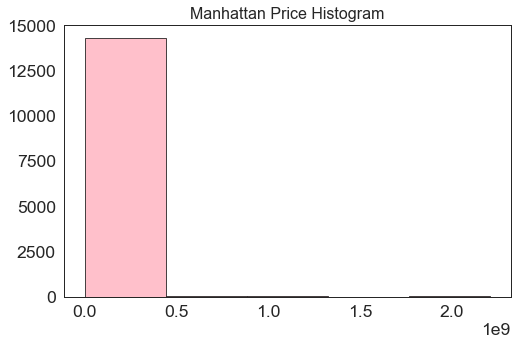

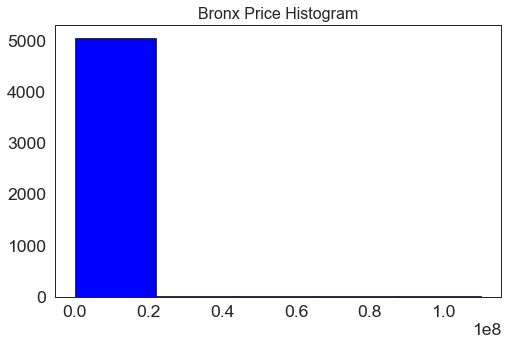

In [44]:
plt.figure(figsize=(8,5))
plt.title("Manhattan Price Histogram",fontsize=16)
plt.hist(manhattan["SALE PRICE"],edgecolor='k',color='pink',bins=5)
plt.show()

plt.figure(figsize=(8,5))
plt.title("Bronx Price Histogram",fontsize=16)
plt.hist(bronx["SALE PRICE"],edgecolor='k',color='blue',bins=5)
plt.show()